# Working with Categorical Data

This notebook provides a comprehensive guide to working with categorical data in data science, including creation, encoding, visualization, and advanced techniques.

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from category_encoders import TargetEncoder, BinaryEncoder, WOEEncoder
import scipy.stats as stats

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

## 2. Understanding Categorical Data

Categorical data represents characteristics or qualities that can be divided into groups or categories. They are typically non-numeric, although they can be represented numerically in some cases.

### Types of Categorical Data

1. **Nominal Data**: Categories with no inherent order (e.g., colors, gender, country)
2. **Ordinal Data**: Categories with a meaningful order (e.g., education level, customer satisfaction ratings)

### Why Categorical Data Matters

- Much of real-world data comes in categorical form
- Proper handling of categorical data is essential for accurate modeling
- Categorical features often contain significant predictive information
- Machine learning algorithms typically require numerical input, so categorical data needs special handling

In [2]:
# Create a simple dataset with categorical variables
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'High School', 'Bachelor', 'PhD', 'Master'],
    'Country': ['USA', 'Canada', 'UK', 'Australia', 'USA', 'Canada', 'UK', 'Australia', 'USA', 'Canada'],
    'Satisfaction': ['Low', 'Medium', 'High', 'Very High', 'Low', 'Medium', 'High', 'Very High', 'Medium', 'High'],
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]
}

df = pd.DataFrame(data)
print("Dataset overview:")
display(df)

# Check data types
print("\nData types:")
print(df.dtypes)

# Identify categorical columns automatically
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns identified: {categorical_columns}")

Dataset overview:


,Gender,Education,Country,Satisfaction,Age,Salary
0,Male,High School,USA,Low,25,50000
1,Female,Bachelor,Canada,Medium,30,60000
2,Male,Master,UK,High,35,70000
3,Female,PhD,Australia,Very High,40,80000
4,Male,Bachelor,USA,Low,45,90000
5,Female,Master,Canada,Medium,50,100000
6,Female,High School,UK,High,55,110000
7,Male,Bachelor,Australia,Very High,60,120000
8,Female,PhD,USA,Medium,65,130000
9,Male,Master,Canada,High,70,140000



Data types:
Gender          object
Education       object
Country         object
Satisfaction    object
Age              int64
Salary           int64
dtype: object

Categorical columns identified: ['Gender', 'Education', 'Country', 'Satisfaction']


## 3. Creating Categorical Data

Pandas provides a special `category` data type that offers memory efficiency and specialized functionality for categorical data. Converting appropriate columns to this type can significantly reduce memory usage, especially for large datasets with repetitive categorical values.

In [3]:
# Convert string columns to category type
df_cat = df.copy()
for col in categorical_columns:
    df_cat[col] = df_cat[col].astype('category')

# Check data types after conversion
print("Data types after conversion to category:")
print(df_cat.dtypes)

# Check memory usage before and after conversion
print("\nMemory usage comparison:")
print(f"Original DataFrame memory usage: {df.memory_usage(deep=True).sum()} bytes")
print(f"Category DataFrame memory usage: {df_cat.memory_usage(deep=True).sum()} bytes")

# Create an ordered categorical variable for Satisfaction
satisfaction_order = ['Low', 'Medium', 'High', 'Very High']
df_cat['Satisfaction'] = pd.Categorical(df_cat['Satisfaction'], 
                                       categories=satisfaction_order, 
                                       ordered=True)

# Demonstrate properties of categorical data
print("\nCategories in 'Education':", df_cat['Education'].cat.categories.tolist())
print("\nCategory codes for 'Education':")
display(pd.DataFrame({'Education': df_cat['Education'], 'Code': df_cat['Education'].cat.codes}))

# Adding a new category
df_cat['Education'] = df_cat['Education'].cat.add_categories(['Associate'])
print("\nCategories after adding 'Associate':", df_cat['Education'].cat.categories.tolist())

# Removing unused categories
df_cat['Education'] = df_cat['Education'].cat.remove_unused_categories()
print("\nCategories after removing unused:", df_cat['Education'].cat.categories.tolist())

Data types after conversion to category:
Gender          category
Education       category
Country         category
Satisfaction    category
Age                int64
Salary             int64
dtype: object

Memory usage comparison:
Original DataFrame memory usage: 2475 bytes
Category DataFrame memory usage: 1722 bytes

Categories in 'Education': ['Bachelor', 'High School', 'Master', 'PhD']

Category codes for 'Education':


,Education,Code
0,High School,1
1,Bachelor,0
2,Master,2
3,PhD,3
4,Bachelor,0
5,Master,2
6,High School,1
7,Bachelor,0
8,PhD,3
9,Master,2



Categories after adding 'Associate': ['Bachelor', 'High School', 'Master', 'PhD', 'Associate']

Categories after removing unused: ['Bachelor', 'High School', 'Master', 'PhD']


## 4. Encoding Categorical Variables

Machine learning algorithms typically require numerical input. Encoding is the process of converting categorical data into numerical format. Several encoding techniques are available, each with its advantages and disadvantages:

1. **Label Encoding**: Assigns a unique integer to each category
2. **One-Hot Encoding**: Creates binary columns for each category
3. **Ordinal Encoding**: Assigns integers based on an ordered relationship
4. **Target Encoding**: Replaces categories with the mean of the target variable

Let's implement and compare these methods:

In [4]:
# # Create a copy of our dataframe for encoding examples
# df_encode = df.copy()

# # 1. Label Encoding
# label_encoder = LabelEncoder()
# df_encode['Gender_Label'] = label_encoder.fit_transform(df_encode['Gender'])
# df_encode['Country_Label'] = label_encoder.fit_transform(df_encode['Country'])

# # 2. One-Hot Encoding 
# # Using pandas get_dummies
# df_onehot = pd.get_dummies(df_encode, columns=['Education', 'Country'], prefix=['Edu', 'Country'])

# # 3. Ordinal Encoding
# # Define the order for our ordinal variable
# satisfaction_order = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
# df_encode['Satisfaction_Ordinal'] = df_encode['Satisfaction'].map(satisfaction_order)

# # Alternative with scikit-learn
# ordinal_encoder = OrdinalEncoder(categories=[satisfaction_order.keys()])
# df_encode['Satisfaction_Ordinal2'] = ordinal_encoder.fit_transform(df_encode[['Satisfaction']])

# # 4. Target Encoding (using salary as target for demonstration)
# # For realistic use, we'd split the data first to avoid data leakage
# encoder = TargetEncoder()
# df_encode['Country_Target'] = encoder.fit_transform(df_encode['Country'], df_encode['Salary'])

# # Display the results
# print("Label Encoding Results:")
# display(df_encode[['Gender', 'Gender_Label', 'Country', 'Country_Label']])

# print("\nOrdinal Encoding Results:")
# display(df_encode[['Satisfaction', 'Satisfaction_Ordinal']])

# print("\nTarget Encoding Results:")
# display(df_encode[['Country', 'Salary', 'Country_Target']])

# print("\nOne-Hot Encoding Results (partial view):")
# display(df_onehot.head(3))

# # Compare encoding methods
# print("\nComparison of Encoding Methods:")
# print("1. Label Encoding:")
# print("   + Simple and straightforward")
# print("   + Maintains a single column")
# print("   - Implies an ordinal relationship that may not exist")
# print("   - Can mislead algorithms to infer numerical relationships")

# print("\n2. One-Hot Encoding:")
# print("   + No ordinal relationship implied")
# print("   + Works well with most algorithms")
# print("   - Creates many columns (curse of dimensionality)")
# print("   - Memory intensive for high-cardinality features")

# print("\n3. Ordinal Encoding:")
# print("   + Preserves order information")
# print("   + Memory efficient")
# print("   - Only appropriate when order matters")
# print("   - Requires domain knowledge to define order")

# print("\n4. Target Encoding:")
# print("   + Captures relationship with target variable")
# print("   + Handles high-cardinality well")
# print("   - Risk of target leakage")
# print("   - Requires careful validation strategy")

```
IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed
```

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as stats

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

# ---------------------------
# Encoding Demonstration Code
# ---------------------------

# Create a copy of our dataframe for encoding examples
df_encode = df.copy()

# 1. Label Encoding
label_encoder = LabelEncoder()
df_encode['Gender_Label'] = label_encoder.fit_transform(df_encode['Gender'])
df_encode['Country_Label'] = label_encoder.fit_transform(df_encode['Country'])

# 2. One-Hot Encoding 
# Using pandas get_dummies
df_onehot = pd.get_dummies(df_encode, columns=['Education', 'Country'], prefix=['Edu', 'Country'])

# 3. Ordinal Encoding
# Define the order for our ordinal variable
satisfaction_order = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
df_encode['Satisfaction_Ordinal'] = df_encode['Satisfaction'].map(satisfaction_order)

# Alternative with scikit-learn
ordinal_encoder = OrdinalEncoder(categories=[list(satisfaction_order.keys())])
df_encode['Satisfaction_Ordinal2'] = ordinal_encoder.fit_transform(df_encode[['Satisfaction']])

# 4. Target Encoding (manual alternative)
# Avoid target leakage in real projects: use on training data only
df_encode['Country_Target'] = df_encode.groupby('Country')['Salary'].transform('mean')

# Display the results
print("Label Encoding Results:")
display(df_encode[['Gender', 'Gender_Label', 'Country', 'Country_Label']])

print("\nOrdinal Encoding Results:")
display(df_encode[['Satisfaction', 'Satisfaction_Ordinal', 'Satisfaction_Ordinal2']])

print("\nTarget Encoding Results:")
display(df_encode[['Country', 'Salary', 'Country_Target']])

print("\nOne-Hot Encoding Results (partial view):")
display(df_onehot.head(3))

# Compare encoding methods
print("\nComparison of Encoding Methods:")
print("1. Label Encoding:")
print("   + Simple and straightforward")
print("   + Maintains a single column")
print("   - Implies an ordinal relationship that may not exist")
print("   - Can mislead algorithms to infer numerical relationships")

print("\n2. One-Hot Encoding:")
print("   + No ordinal relationship implied")
print("   + Works well with most algorithms")
print("   - Creates many columns (curse of dimensionality)")
print("   - Memory intensive for high-cardinality features")

print("\n3. Ordinal Encoding:")
print("   + Preserves order information")
print("   + Memory efficient")
print("   - Only appropriate when order matters")
print("   - Requires domain knowledge to define order")

print("\n4. Target Encoding (manual):")
print("   + Captures relationship with target variable")
print("   + Handles high-cardinality well")
print("   - Risk of target leakage")
print("   - Requires careful validation strategy")

Label Encoding Results:


,Gender,Gender_Label,Country,Country_Label
0,Male,1,USA,3
1,Female,0,Canada,1
2,Male,1,UK,2
3,Female,0,Australia,0
4,Male,1,USA,3
5,Female,0,Canada,1
6,Female,0,UK,2
7,Male,1,Australia,0
8,Female,0,USA,3
9,Male,1,Canada,1



Ordinal Encoding Results:


,Satisfaction,Satisfaction_Ordinal,Satisfaction_Ordinal2
0,Low,0,0.0
1,Medium,1,1.0
2,High,2,2.0
3,Very High,3,3.0
4,Low,0,0.0
5,Medium,1,1.0
6,High,2,2.0
7,Very High,3,3.0
8,Medium,1,1.0
9,High,2,2.0



Target Encoding Results:


,Country,Salary,Country_Target
0,USA,50000,90000.0
1,Canada,60000,100000.0
2,UK,70000,90000.0
3,Australia,80000,100000.0
4,USA,90000,90000.0
5,Canada,100000,100000.0
6,UK,110000,90000.0
7,Australia,120000,100000.0
8,USA,130000,90000.0
9,Canada,140000,100000.0



One-Hot Encoding Results (partial view):


,Gender,Satisfaction,Age,Salary,Gender_Label,Country_Label,Edu_Bachelor,Edu_High School,Edu_Master,Edu_PhD,Country_Australia,Country_Canada,Country_UK,Country_USA
0,Male,Low,25,50000,1,3,False,True,False,False,False,False,False,True
1,Female,Medium,30,60000,0,1,True,False,False,False,False,True,False,False
2,Male,High,35,70000,1,2,False,False,True,False,False,False,True,False



Comparison of Encoding Methods:
1. Label Encoding:
   + Simple and straightforward
   + Maintains a single column
   - Implies an ordinal relationship that may not exist
   - Can mislead algorithms to infer numerical relationships

2. One-Hot Encoding:
   + No ordinal relationship implied
   + Works well with most algorithms
   - Creates many columns (curse of dimensionality)
   - Memory intensive for high-cardinality features

3. Ordinal Encoding:
   + Preserves order information
   + Memory efficient
   - Only appropriate when order matters
   - Requires domain knowledge to define order

4. Target Encoding (manual):
   + Captures relationship with target variable
   + Handles high-cardinality well
   - Risk of target leakage
   - Requires careful validation strategy


## 5. Working with Categorical Data in Pandas

Pandas provides powerful functionality for working with categorical data, including filtering, grouping, and sorting operations specific to categorical variables.

In [6]:
# Working with categorical data in pandas
# Create a sample dataset
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Laptop', 'Phone', 'Tablet', 'Laptop', 'Phone', 'Tablet', 'Laptop'],
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Red', 'Blue', 'Green', 'Red'],
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Medium', 'Large', 'Medium', 'Large', 'Small', 'Large'],
    'Rating': [4, 3, 5, 2, 4, 3, 5, 4, 3, 5],
    'Price': [1200, 800, 600, 1500, 700, 550, 1300, 850, 500, 1400]
}

cat_df = pd.DataFrame(data)
cat_df['Size'] = pd.Categorical(cat_df['Size'], categories=['Small', 'Medium', 'Large'], ordered=True)
cat_df['Color'] = cat_df['Color'].astype('category')
cat_df['Product'] = cat_df['Product'].astype('category')

print("Dataset with categorical variables:")
display(cat_df)
print(cat_df.dtypes)

# Filtering by categorical value
print("\nFiltering laptops only:")
display(cat_df[cat_df['Product'] == 'Laptop'])

# Grouping by categorical variable (with observed=False to silence the warning)
print("\nAverage price by product type:")
display(cat_df.groupby('Product', observed=False)['Price'].mean())

print("\nAverage rating by size:")
display(cat_df.groupby('Size', observed=False)['Rating'].mean())

# Sorting by categorical variable (using ordered category)
print("\nData sorted by Size (ordered categorical):")
display(cat_df.sort_values('Size'))

# Cross-tabulation of categorical variables (without the observed argument)
print("\nCross-tabulation of Product vs. Color:")
display(pd.crosstab(cat_df['Product'], cat_df['Color']))

# Aggregation with multiple functions (with observed=False to silence the warning)
print("\nAggregation by Product:")
display(cat_df.groupby('Product', observed=False).agg({
    'Price': ['mean', 'min', 'max'],
    'Rating': ['mean', 'count']
}))

# Filtering with categorical comparisons (for ordered categories)
print("\nItems that are Medium or larger:")
display(cat_df[cat_df['Size'] >= 'Medium'])

# Value counts and frequency analysis
print("\nFrequency of each product:")
display(cat_df['Product'].value_counts())

print("\nRelative frequency (percentage):")
display(cat_df['Product'].value_counts(normalize=True) * 100)

Dataset with categorical variables:


,Product,Color,Size,Rating,Price
0,Laptop,Red,Small,4,1200
1,Phone,Blue,Medium,3,800
2,Tablet,Green,Large,5,600
3,Laptop,Red,Small,2,1500
4,Phone,Blue,Medium,4,700
5,Tablet,Green,Large,3,550
6,Laptop,Red,Medium,5,1300
7,Phone,Blue,Large,4,850
8,Tablet,Green,Small,3,500
9,Laptop,Red,Large,5,1400


Product    category
Color      category
Size       category
Rating        int64
Price         int64
dtype: object

Filtering laptops only:


,Product,Color,Size,Rating,Price
0,Laptop,Red,Small,4,1200
3,Laptop,Red,Small,2,1500
6,Laptop,Red,Medium,5,1300
9,Laptop,Red,Large,5,1400



Average price by product type:


Product
Laptop    1350.000000
Phone      783.333333
Tablet     550.000000
Name: Price, dtype: float64


Average rating by size:


Size
Small     3.00
Medium    4.00
Large     4.25
Name: Rating, dtype: float64


Data sorted by Size (ordered categorical):


,Product,Color,Size,Rating,Price
0,Laptop,Red,Small,4,1200
3,Laptop,Red,Small,2,1500
8,Tablet,Green,Small,3,500
1,Phone,Blue,Medium,3,800
4,Phone,Blue,Medium,4,700
6,Laptop,Red,Medium,5,1300
2,Tablet,Green,Large,5,600
5,Tablet,Green,Large,3,550
7,Phone,Blue,Large,4,850
9,Laptop,Red,Large,5,1400



Cross-tabulation of Product vs. Color:


Color,Blue,Green,Red
Product,,,
Laptop,0,0,4
Phone,3,0,0
Tablet,0,3,0



Aggregation by Product:


Price                Rating      
                mean   min   max      mean count
Product                                         
Laptop   1350.000000  1200  1500  4.000000     4
Phone     783.333333   700   850  3.666667     3
Tablet    550.000000   500   600  3.666667     3


Items that are Medium or larger:


,Product,Color,Size,Rating,Price
1,Phone,Blue,Medium,3,800
2,Tablet,Green,Large,5,600
4,Phone,Blue,Medium,4,700
5,Tablet,Green,Large,3,550
6,Laptop,Red,Medium,5,1300
7,Phone,Blue,Large,4,850
9,Laptop,Red,Large,5,1400



Frequency of each product:


Product
Laptop    4
Phone     3
Tablet    3
Name: count, dtype: int64


Relative frequency (percentage):


Product
Laptop    40.0
Phone     30.0
Tablet    30.0
Name: proportion, dtype: float64

## 6. Visualization of Categorical Data

Visualizing categorical data helps uncover patterns and relationships. We'll use matplotlib and seaborn to create various plots specifically designed for categorical data analysis.

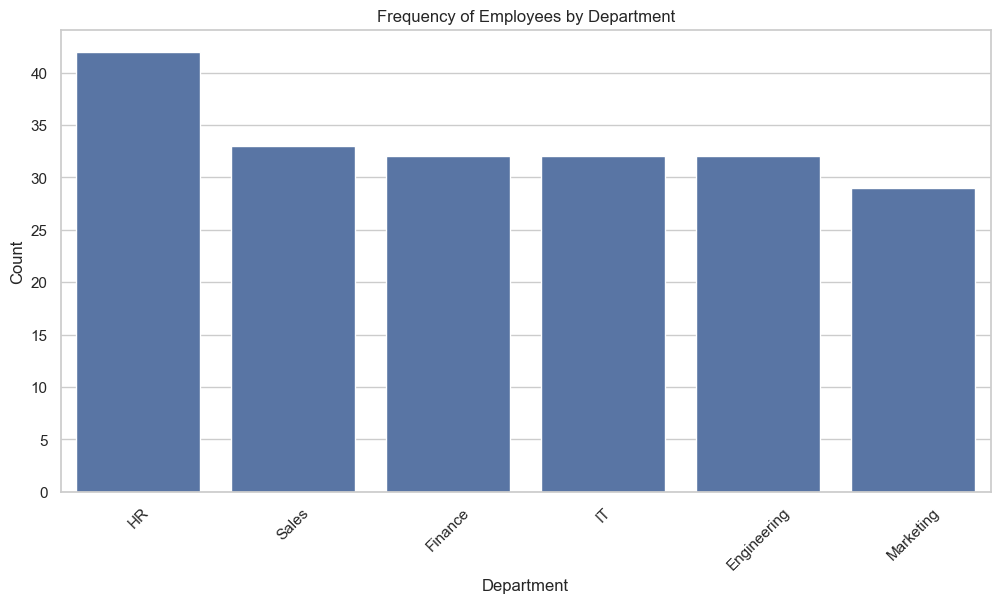

<Figure size 1200x800 with 0 Axes>

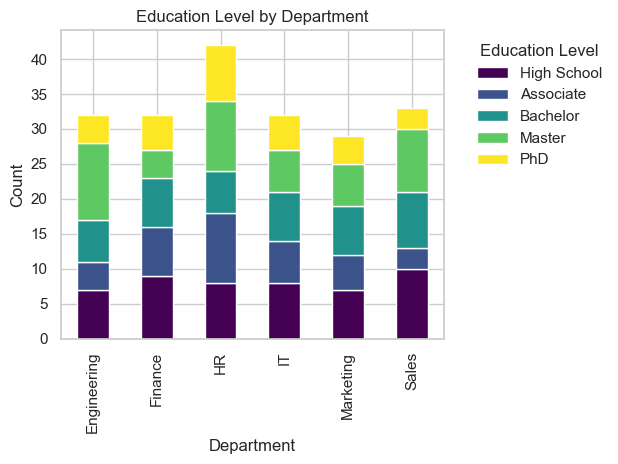

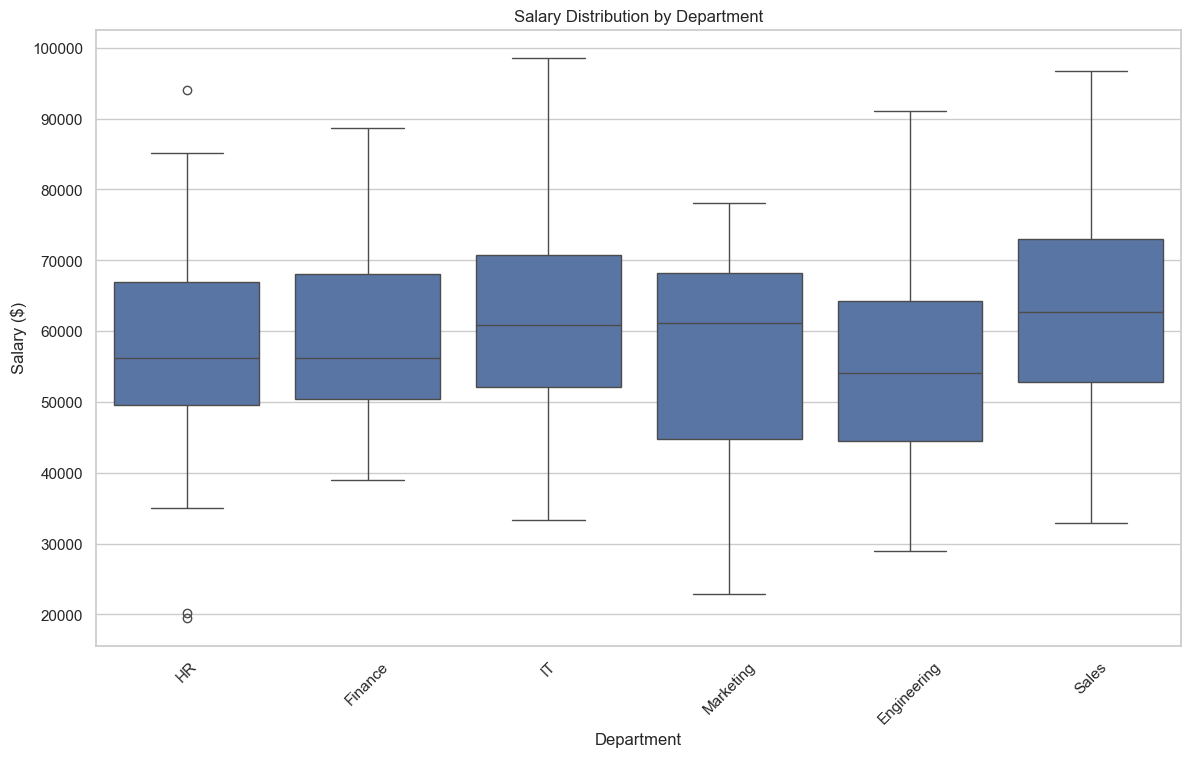

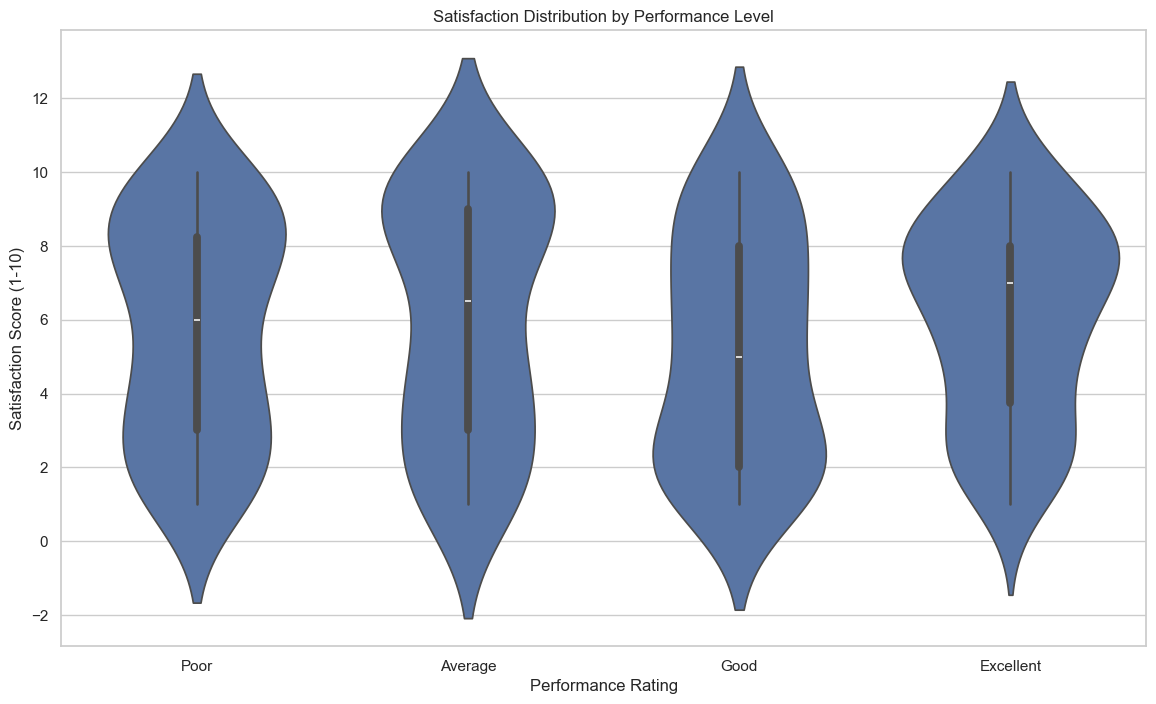

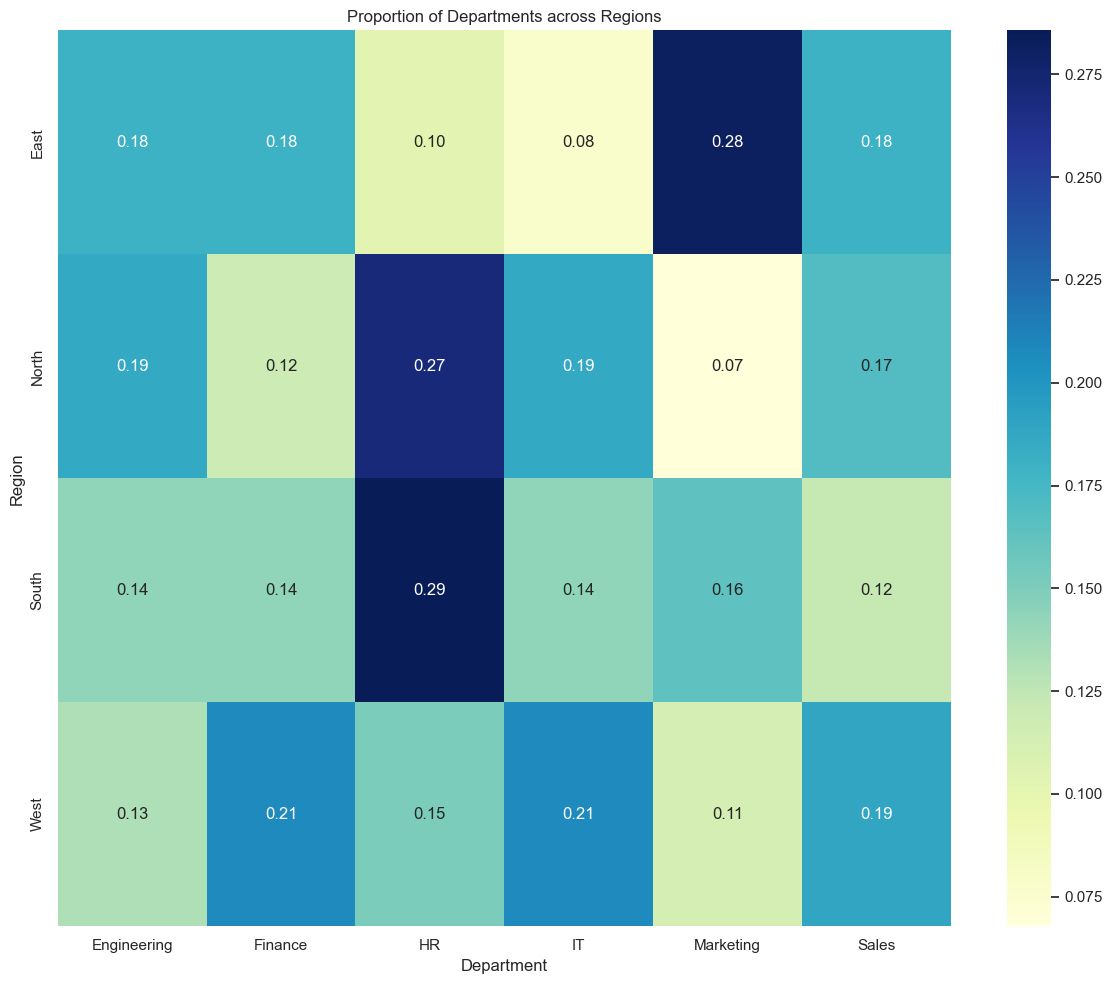

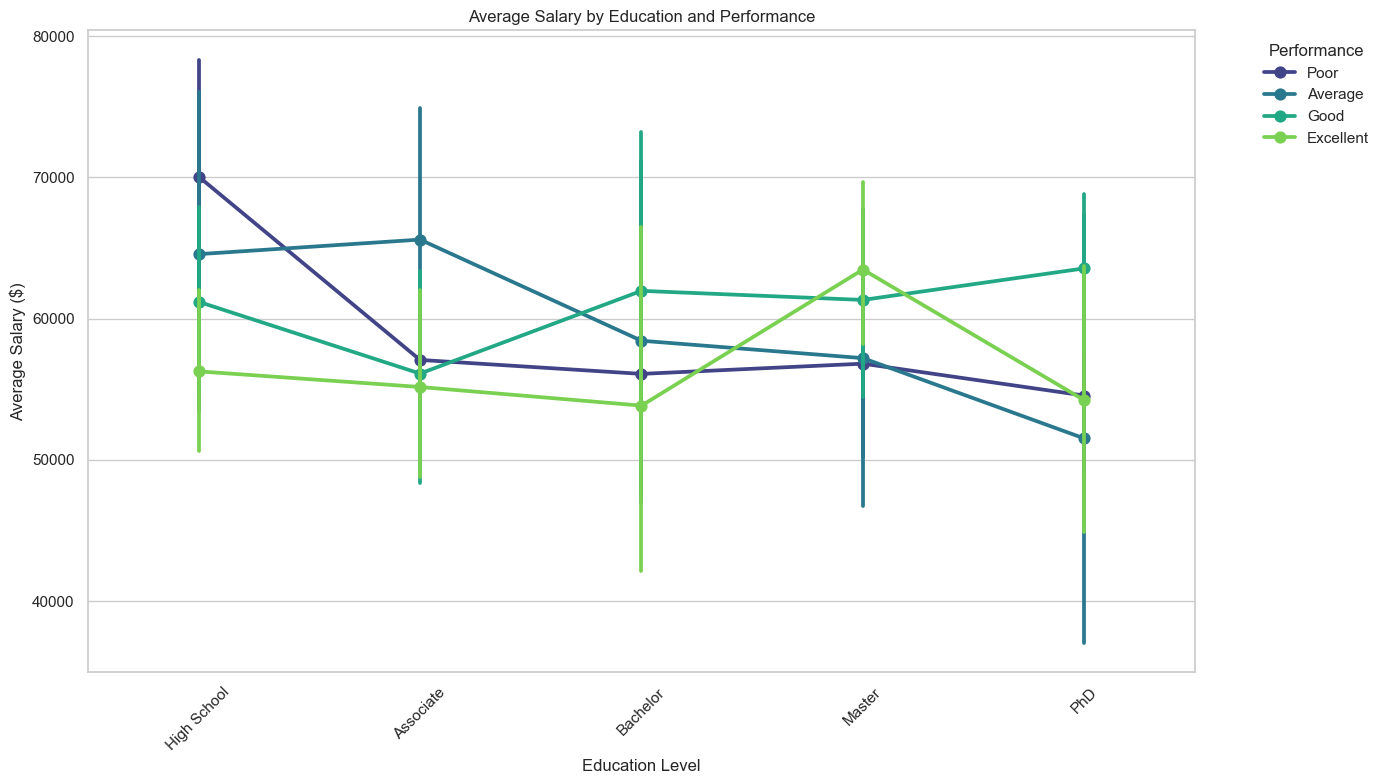

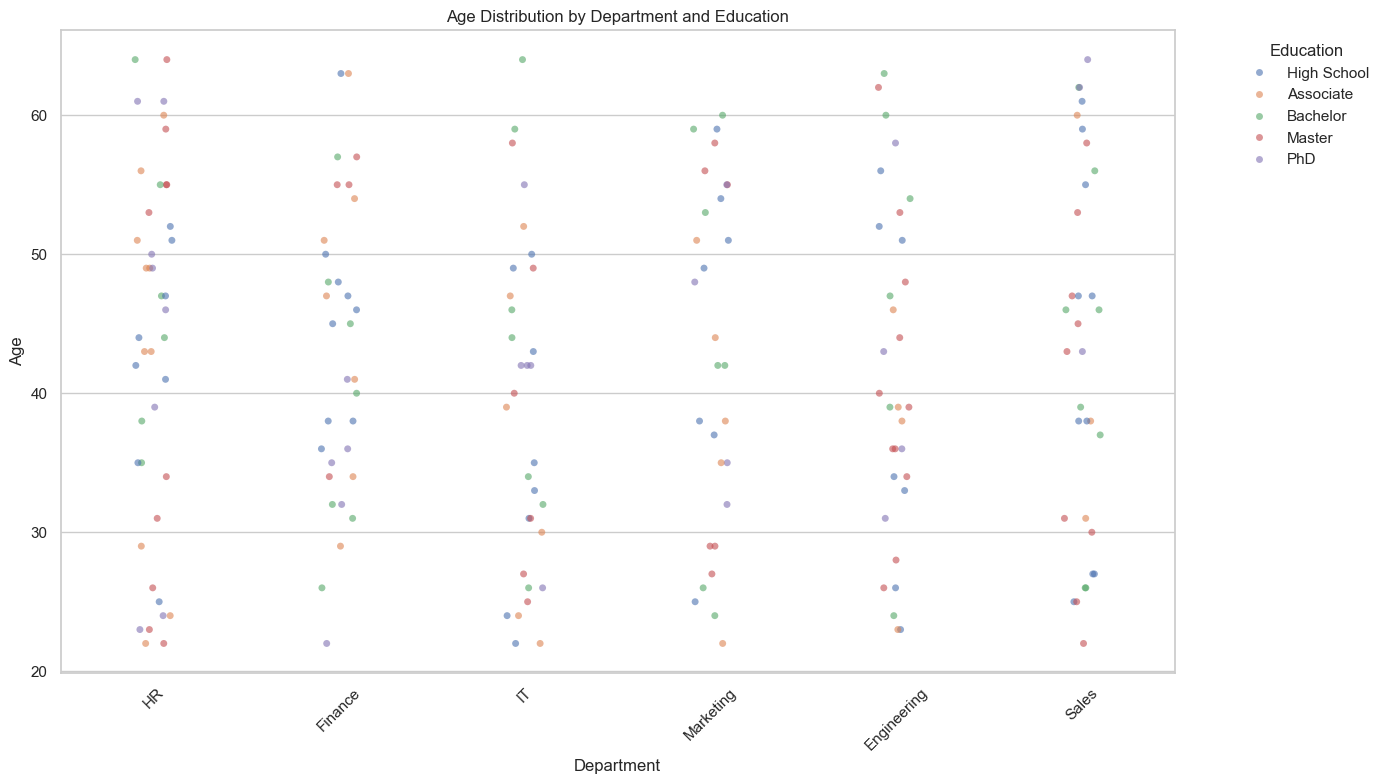

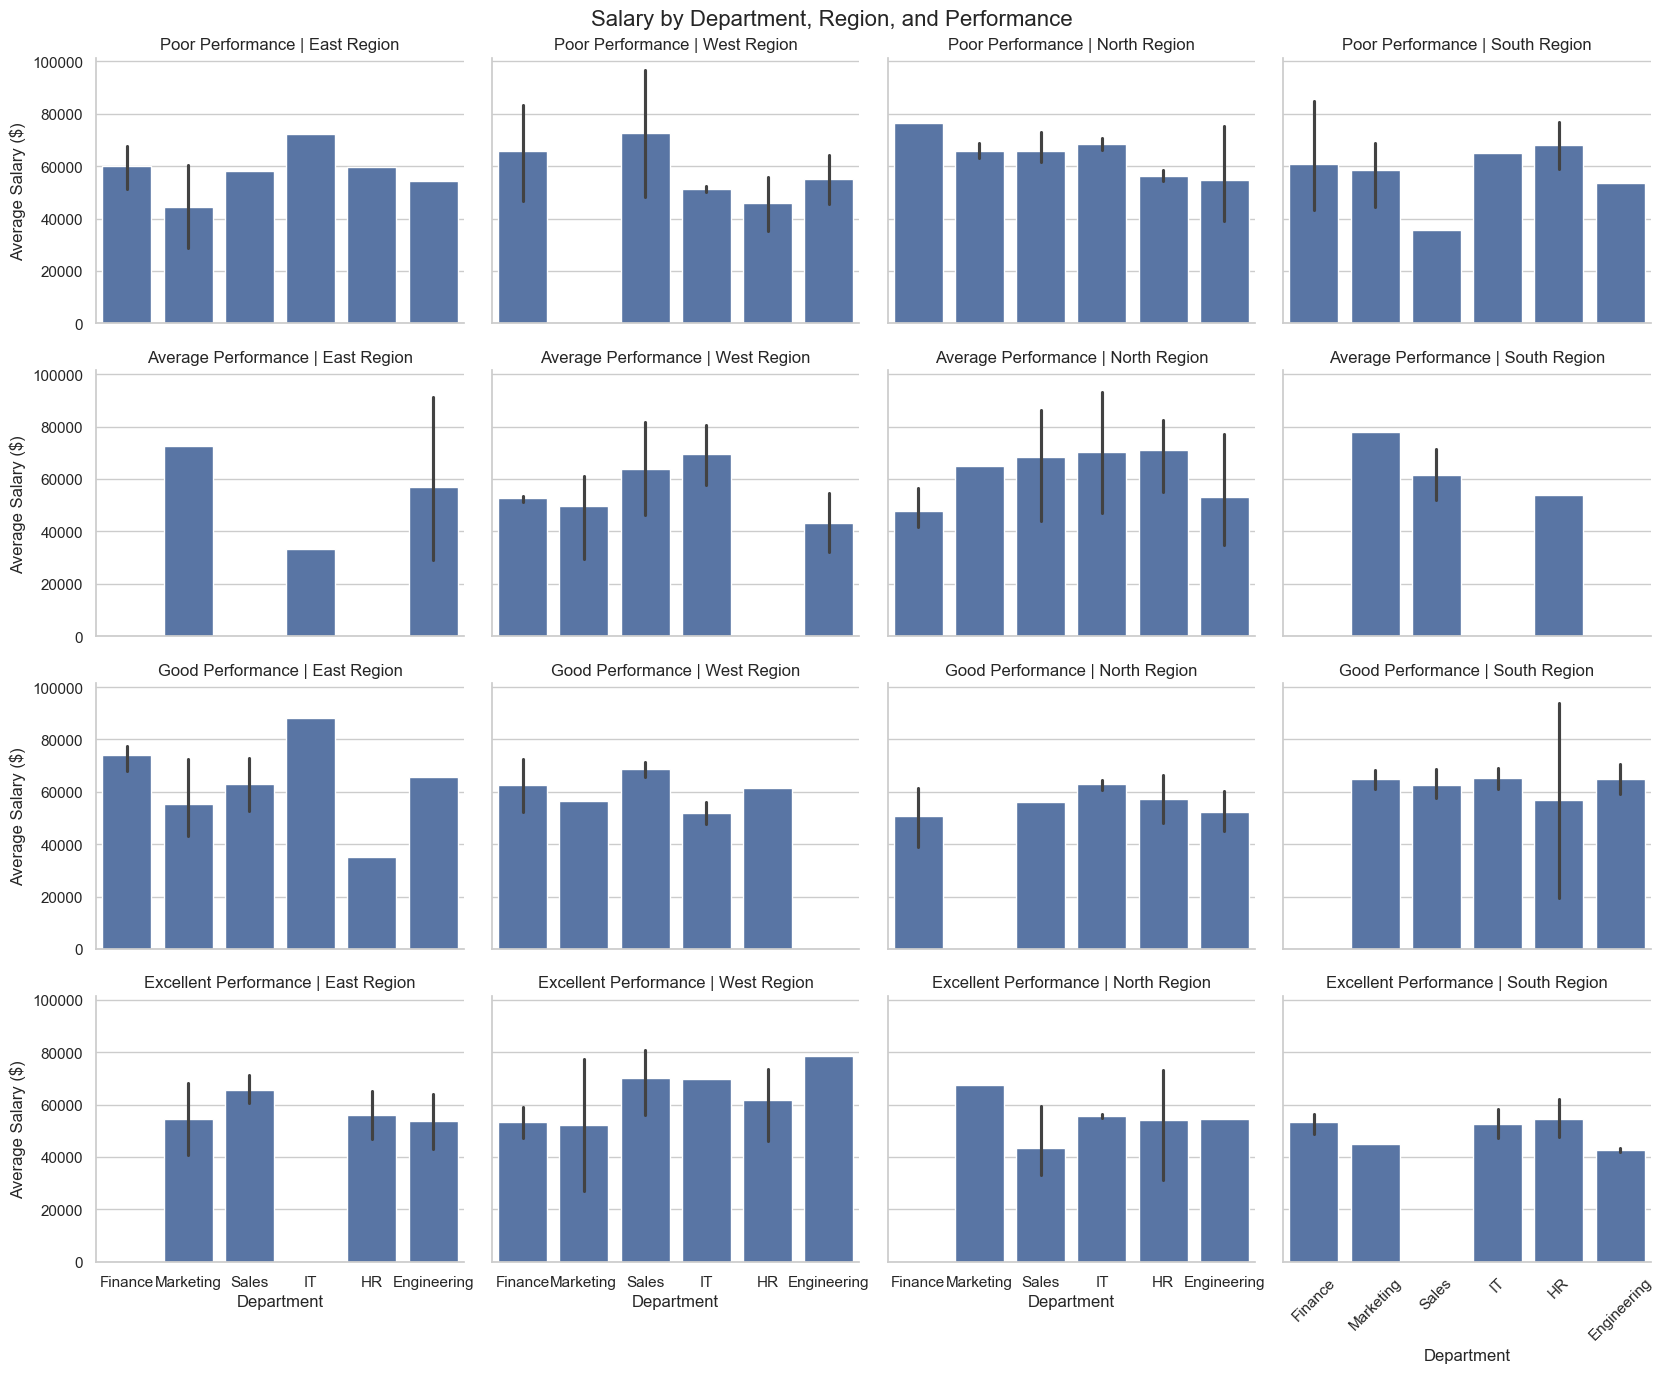

In [7]:
# Create a larger dataset for better visualizations
np.random.seed(42)
n = 200

categories = {
    'Department': ['Sales', 'Marketing', 'IT', 'HR', 'Finance', 'Engineering'],
    'Education': ['High School', 'Associate', 'Bachelor', 'Master', 'PhD'],
    'Region': ['North', 'South', 'East', 'West'],
    'Performance': ['Poor', 'Average', 'Good', 'Excellent']
}

vis_data = {
    'Department': np.random.choice(categories['Department'], size=n),
    'Education': np.random.choice(categories['Education'], size=n),
    'Region': np.random.choice(categories['Region'], size=n),
    'Performance': np.random.choice(categories['Performance'], size=n),
    'Age': np.random.randint(22, 65, size=n),
    'Salary': np.random.normal(60000, 15000, size=n),
    'Experience': np.random.randint(0, 30, size=n),
    'Satisfaction': np.random.randint(1, 11, size=n)
}

vis_df = pd.DataFrame(vis_data)

# Convert categorical columns to category type with appropriate ordering
vis_df['Performance'] = pd.Categorical(vis_df['Performance'], 
                                      categories=['Poor', 'Average', 'Good', 'Excellent'], 
                                      ordered=True)

vis_df['Education'] = pd.Categorical(vis_df['Education'],
                                   categories=['High School', 'Associate', 'Bachelor', 'Master', 'PhD'],
                                   ordered=True)

# 1. Bar Chart for frequency of categories
plt.figure(figsize=(12, 6))
sns.countplot(data=vis_df, x='Department', order=vis_df['Department'].value_counts().index)
plt.title('Frequency of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Stacked bar chart for two categorical variables
plt.figure(figsize=(12, 8))
pd.crosstab(vis_df['Department'], vis_df['Education']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Education Level by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Boxplot for categorical vs. numerical data
plt.figure(figsize=(14, 8))
sns.boxplot(data=vis_df, x='Department', y='Salary')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.show()

# 4. Violin plot for categorical vs. numerical data
plt.figure(figsize=(14, 8))
sns.violinplot(data=vis_df, x='Performance', y='Satisfaction')
plt.title('Satisfaction Distribution by Performance Level')
plt.xlabel('Performance Rating')
plt.ylabel('Satisfaction Score (1-10)')
plt.show()

# 5. Heatmap for correlation between categorical variables
plt.figure(figsize=(12, 10))
crosstab = pd.crosstab(vis_df['Region'], vis_df['Department'], normalize='index')
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Proportion of Departments across Regions')
plt.tight_layout()
plt.show()

# 6. Point plot for categorical comparisons
plt.figure(figsize=(14, 8))
sns.pointplot(data=vis_df, x='Education', y='Salary', hue='Performance', palette='viridis')
plt.title('Average Salary by Education and Performance')
plt.xlabel('Education Level')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Categorical scatterplot (stripplot)
plt.figure(figsize=(14, 8))
sns.stripplot(data=vis_df, x='Department', y='Age', hue='Education', jitter=True, alpha=0.6)
plt.title('Age Distribution by Department and Education')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 8. Facetgrid for multi-categorical analysis
g = sns.FacetGrid(vis_df, col="Region", row="Performance", height=3.5, aspect=1.2)
g.map_dataframe(sns.barplot, x="Department", y="Salary")
g.set_axis_labels("Department", "Average Salary ($)")
g.set_titles(col_template="{col_name} Region", row_template="{row_name} Performance")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salary by Department, Region, and Performance', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Statistical Analysis with Categorical Data

Categorical data requires specific statistical tests to analyze relationships:

1. **Chi-Square Test**: Tests association between categorical variables
2. **ANOVA**: Compares means across categorical groups
3. **T-test**: Compares means between two groups
4. **Correlation Analysis**: Measures relationships with categorical variables

Let's implement these techniques:

Contingency Table (Department vs Performance):


Performance,Poor,Average,Good,Excellent
Department,,,,
Engineering,10,8,8,6
Finance,12,6,8,6
HR,15,4,8,15
IT,6,11,8,7
Marketing,10,6,6,7
Sales,7,7,8,11


Chi-Square Test Results:
Chi2 value: 13.4411
p-value: 0.5683
Degrees of freedom: 15
Interpretation: Fail to reject null hypothesis (variables are independent)

One-way ANOVA Results (Salary across Departments):
F-statistic: 1.3986
p-value: 0.2264
Interpretation: Fail to reject null hypothesis (means are equal)

T-test Results (Salary: North vs South):
t-statistic: 0.0399
p-value: 0.9683
Interpretation: Fail to reject null hypothesis (means are equal)

Point-Biserial Correlation (Senior Role vs Salary):
Correlation: -0.0028
p-value: 0.9685
Interpretation: No significant correlation


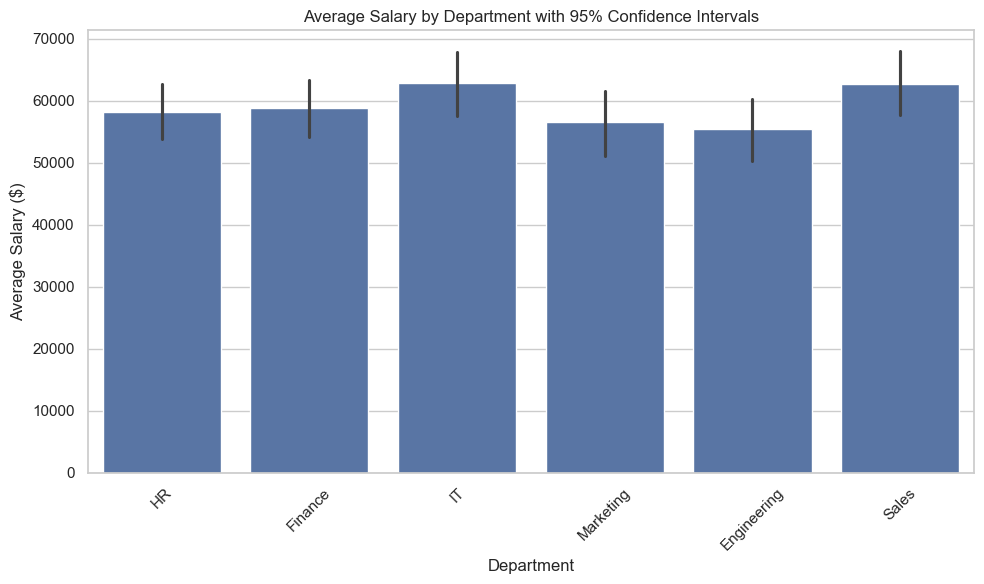

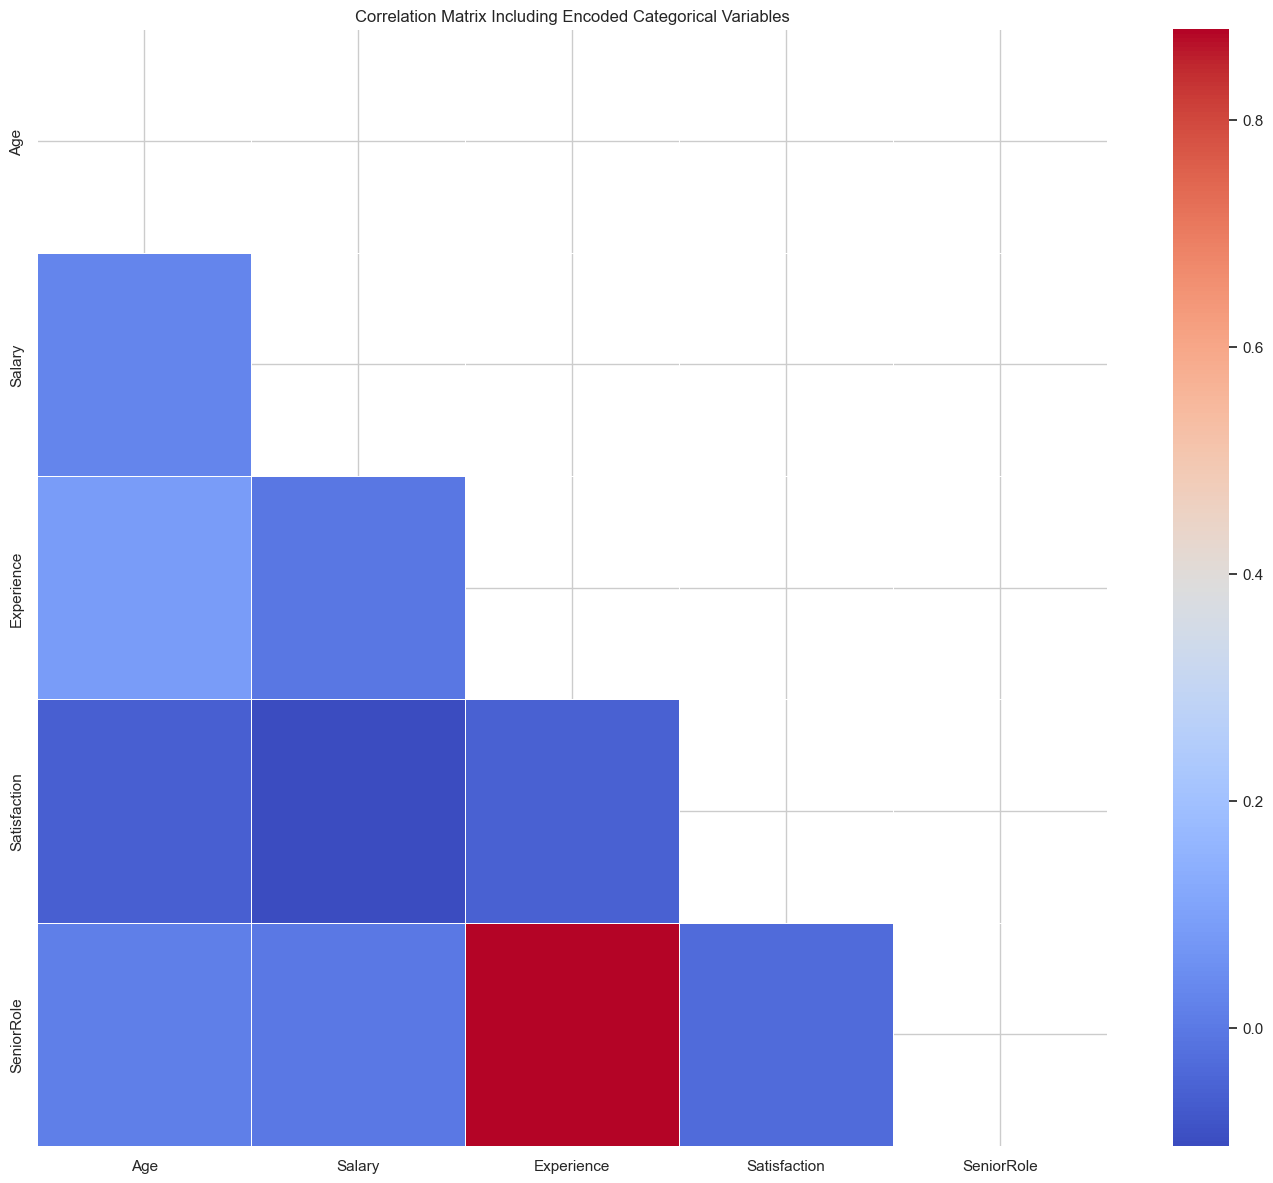

In [8]:
# Statistical analysis with categorical data
stats_df = vis_df.copy()

# 1. Chi-Square Test of Independence
# Create a contingency table
contingency = pd.crosstab(stats_df['Department'], stats_df['Performance'])
print("Contingency Table (Department vs Performance):")
display(contingency)

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-Square Test Results:")
print(f"Chi2 value: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Interpretation: {'Reject null hypothesis (variables are dependent)' if p < 0.05 else 'Fail to reject null hypothesis (variables are independent)'}")

# 2. ANOVA - Comparing means across groups
from scipy.stats import f_oneway

# Group salary by department
groups = [stats_df[stats_df['Department'] == dept]['Salary'].values for dept in stats_df['Department'].unique()]
f_stat, p_val = f_oneway(*groups)
print("\nOne-way ANOVA Results (Salary across Departments):")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Interpretation: {'Reject null hypothesis (means are different)' if p_val < 0.05 else 'Fail to reject null hypothesis (means are equal)'}")

# 3. T-test between two groups
from scipy.stats import ttest_ind

# Compare salary between two regions
group1 = stats_df[stats_df['Region'] == 'North']['Salary']
group2 = stats_df[stats_df['Region'] == 'South']['Salary']
t_stat, p_val = ttest_ind(group1, group2)
print("\nT-test Results (Salary: North vs South):")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Interpretation: {'Reject null hypothesis (means are different)' if p_val < 0.05 else 'Fail to reject null hypothesis (means are equal)'}")

# 4. Point-Biserial Correlation (for binary categorical vs numerical)
# Create a binary variable for demonstration
stats_df['SeniorRole'] = (stats_df['Experience'] > 15).astype(int)
from scipy.stats import pointbiserialr
r, p = pointbiserialr(stats_df['SeniorRole'], stats_df['Salary'])
print("\nPoint-Biserial Correlation (Senior Role vs Salary):")
print(f"Correlation: {r:.4f}")
print(f"p-value: {p:.4f}")
print(f"Interpretation: {'Significant correlation' if p < 0.05 else 'No significant correlation'}")

# 5. Visualize statistical comparisons
plt.figure(figsize=(10, 6))
sns.barplot(data=stats_df, x='Department', y='Salary', errorbar=('ci', 95))
plt.title('Average Salary by Department with 95% Confidence Intervals')
plt.xlabel('Department')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # 6. Correlation matrix with encoded categorical variables
# # One-hot encode categorical variables
# encoded_df = pd.get_dummies(stats_df, columns=['Department', 'Region', 'Performance'], drop_first=True)

# # Calculate correlation matrix
# corr_matrix = encoded_df.corr()

# # Plot correlation heatmap
# plt.figure(figsize=(14, 12))
# mask = np.triu(corr_matrix)
# sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix Including Encoded Categorical Variables')
# plt.tight_layout()
# plt.show()

# 6. Correlation matrix with encoded categorical variables
# First, make a copy to avoid side effects
corr_df = stats_df.copy()

# One-hot encode all categorical columns
categorical_cols = corr_df.select_dtypes(include='object').columns
corr_df = pd.get_dummies(corr_df, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric before correlation
numeric_df = corr_df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Encoded Categorical Variables')
plt.tight_layout()
plt.show()

## 8. Feature Engineering with Categorical Variables

Feature engineering is crucial for extracting value from categorical data. Advanced encoding techniques can significantly improve model performance.

Feature engineering dataset:


,Product,Brand,Store,Shipping,Day,Price,Purchase
0,Headphones,Apple,Costco,Express,Thursday,1257.970285,237.948045
1,Monitor,Apple,Target,In-Store Pickup,Monday,589.250868,484.151787
2,Keyboard,Dell,Newegg,In-Store Pickup,Thursday,738.368981,102.811914
3,Headphones,Asus,Walmart,Standard,Tuesday,351.749847,139.437975
4,Tablet,Samsung,Target,Standard,Wednesday,676.045029,645.931447



Frequency Encoding Example:


,Product,Product_freq
194,Headphones,0.161905
68,Monitor,0.138095
37,Laptop,0.138095
179,Tablet,0.133333
140,Speakers,0.119048
69,Mouse,0.119048
101,Phone,0.095238
262,Keyboard,0.095238



Target Encoding Example:


,Product,Product_target
37,Laptop,1060.757293
101,Phone,638.223879
179,Tablet,487.272599
68,Monitor,367.507259
140,Speakers,300.395218
262,Keyboard,278.461681
194,Headphones,222.305747
69,Mouse,198.344617



Binary Encoding Example:


,Product,Brand,Product_0,Product_1,Product_2,Product_3,Brand_0,Brand_1,Brand_2,Brand_3
194,Headphones,Lenovo,0,0,0,1,0,0,0,1
101,Phone,HP,0,0,1,0,0,0,1,0
68,Monitor,Dell,0,0,1,1,0,0,1,1
224,Phone,Samsung,0,0,1,0,0,1,0,0
37,Laptop,Dell,0,1,0,0,0,0,1,1
16,Monitor,Dell,0,0,1,1,0,0,1,1
179,Tablet,HP,0,1,0,1,0,0,1,0
147,Tablet,Asus,0,1,0,1,0,1,0,1
274,Laptop,Acer,0,1,0,0,0,1,1,0
67,Laptop,Samsung,0,1,0,0,0,1,0,0



Weight of Evidence Encoding Example:


,Product,Product_woe
69,Mouse,-3.258097
262,Keyboard,-3.044522
194,Headphones,-2.833213
140,Speakers,-2.079442
68,Monitor,1.648659
101,Phone,3.044522
179,Tablet,3.367296
37,Laptop,3.401197



Entity Embedding:
Entity embedding is a technique where categorical variables are embedded in a
lower-dimensional space, similar to word embeddings in NLP.
This is typically implemented in neural networks by:
1. Converting categories to integers
2. Creating an embedding layer
3. Learning embeddings during model training

Advantages:
- Captures complex relationships between categories
- Efficient for high-cardinality features
- Can transfer knowledge between similar categories

Encoding Method Comparison (Linear Regression):


,RMSE,R²
Frequency Encoding,429.239295,-0.067047
Target Encoding,131.397587,0.900009
One-Hot Encoding,104.161534,0.937165
WOE Encoding,261.671738,0.603450


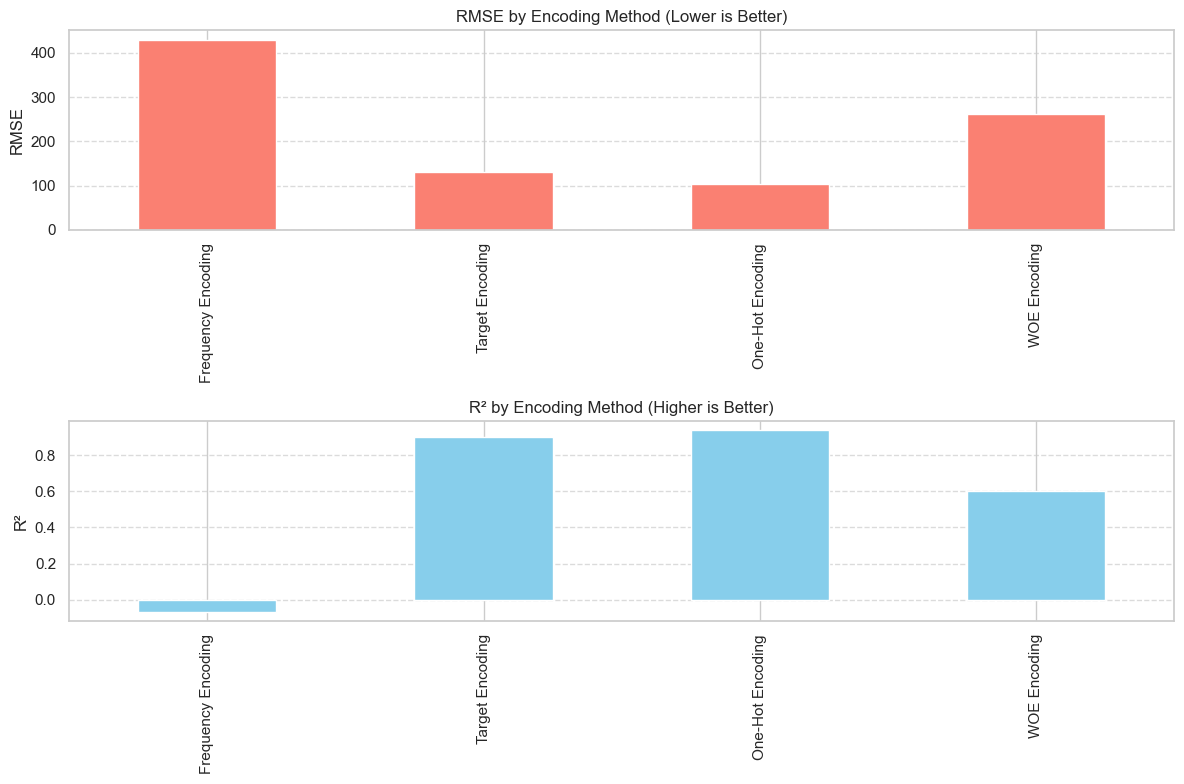

In [9]:
# Feature engineering with categorical data
from category_encoders import WOEEncoder, TargetEncoder, BinaryEncoder, HashingEncoder
import warnings
warnings.filterwarnings('ignore')

# Create a dataset for classification
np.random.seed(42)
n = 300

# Generate data
fe_data = {
    'Product': np.random.choice(['Laptop', 'Phone', 'Tablet', 'Monitor', 'Keyboard', 'Mouse', 'Headphones', 'Speakers'], size=n),
    'Brand': np.random.choice(['Apple', 'Samsung', 'Dell', 'HP', 'Lenovo', 'Asus', 'Acer', 'Microsoft'], size=n),
    'Store': np.random.choice(['Amazon', 'BestBuy', 'Walmart', 'Target', 'Costco', 'Newegg'], size=n),
    'Shipping': np.random.choice(['Standard', 'Express', 'Next Day', 'In-Store Pickup'], size=n),
    'Day': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=n),
    'Price': np.random.gamma(5, 100, n)
}

fe_df = pd.DataFrame(fe_data)

# Create a target variable (simulated purchase amount)
base_values = {'Laptop': 1200, 'Phone': 800, 'Tablet': 500, 'Monitor': 300, 
              'Keyboard': 100, 'Mouse': 50, 'Headphones': 150, 'Speakers': 200}
brand_factors = {'Apple': 1.5, 'Samsung': 1.3, 'Dell': 1.0, 'HP': 0.9, 
                'Lenovo': 0.95, 'Asus': 0.92, 'Acer': 0.85, 'Microsoft': 1.1}

fe_df['Purchase'] = fe_df.apply(lambda row: 
                                base_values[row['Product']] * 
                                brand_factors[row['Brand']] * 
                                (1 + np.random.normal(0, 0.1)), axis=1)

print("Feature engineering dataset:")
display(fe_df.head())

# Split into train and test sets
X = fe_df.drop('Purchase', axis=1)
y = fe_df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Frequency Encoding
def frequency_encoder(df, col):
    freq_map = df[col].value_counts(normalize=True).to_dict()
    return df[col].map(freq_map)

# Apply frequency encoding
X_train_freq = X_train.copy()
X_test_freq = X_test.copy()

for col in ['Product', 'Brand', 'Store', 'Shipping', 'Day']:
    X_train_freq[f'{col}_freq'] = frequency_encoder(X_train, col)
    # Use the training frequencies for the test set to avoid data leakage
    X_test_freq[f'{col}_freq'] = X_test[col].map(X_train[col].value_counts(normalize=True).to_dict())

print("\nFrequency Encoding Example:")
display(X_train_freq[['Product', 'Product_freq']].drop_duplicates().sort_values('Product_freq', ascending=False))

# 2. Target Encoding
target_encoder = TargetEncoder()
X_train_target = X_train.copy()
X_test_target = X_test.copy()

for col in ['Product', 'Brand', 'Store', 'Shipping', 'Day']:
    X_train_target[f'{col}_target'] = target_encoder.fit_transform(X_train[col], y_train)
    X_test_target[f'{col}_target'] = target_encoder.transform(X_test[col])

print("\nTarget Encoding Example:")
display(X_train_target[['Product', 'Product_target']].drop_duplicates().sort_values('Product_target', ascending=False))

# 3. Binary Encoding
binary_encoder = BinaryEncoder()
encoded_cols = binary_encoder.fit_transform(X_train[['Product', 'Brand']])
print("\nBinary Encoding Example:")
display(pd.concat([X_train[['Product', 'Brand']], encoded_cols], axis=1).head(10))

# 4. Weight of Evidence (WOE) Encoding
# For WOE, we need a binary target. Let's create one for demonstration
y_train_binary = (y_train > y_train.median()).astype(int)
y_test_binary = (y_test > y_test.median()).astype(int)

woe_encoder = WOEEncoder()
X_train_woe = X_train.copy()
X_test_woe = X_test.copy()

for col in ['Product', 'Brand', 'Store']:
    X_train_woe[f'{col}_woe'] = woe_encoder.fit_transform(X_train[col], y_train_binary)
    X_test_woe[f'{col}_woe'] = woe_encoder.transform(X_test[col])

print("\nWeight of Evidence Encoding Example:")
display(X_train_woe[['Product', 'Product_woe']].drop_duplicates().sort_values('Product_woe'))

# 5. Entity Embedding (concept explanation)
print("\nEntity Embedding:")
print("Entity embedding is a technique where categorical variables are embedded in a")
print("lower-dimensional space, similar to word embeddings in NLP.")
print("This is typically implemented in neural networks by:")
print("1. Converting categories to integers")
print("2. Creating an embedding layer")
print("3. Learning embeddings during model training")
print("\nAdvantages:")
print("- Captures complex relationships between categories")
print("- Efficient for high-cardinality features")
print("- Can transfer knowledge between similar categories")

# 6. Compare different encoding techniques with a simple model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

# Prepare different feature sets
# One-hot encoding
X_train_onehot = pd.get_dummies(X_train, columns=['Product', 'Brand', 'Store', 'Shipping', 'Day'], drop_first=True)
X_test_onehot = pd.get_dummies(X_test, columns=['Product', 'Brand', 'Store', 'Shipping', 'Day'], drop_first=True)

# Ensure train and test have the same columns
missing_cols = set(X_train_onehot.columns) - set(X_test_onehot.columns)
for col in missing_cols:
    X_test_onehot[col] = 0
X_test_onehot = X_test_onehot[X_train_onehot.columns]

# Create models with different encodings
models = {
    'Frequency Encoding': (X_train_freq.drop(['Product', 'Brand', 'Store', 'Shipping', 'Day'], axis=1), 
                         X_test_freq.drop(['Product', 'Brand', 'Store', 'Shipping', 'Day'], axis=1)),
    'Target Encoding': (X_train_target.drop(['Product', 'Brand', 'Store', 'Shipping', 'Day'], axis=1), 
                      X_test_target.drop(['Product', 'Brand', 'Store', 'Shipping', 'Day'], axis=1)),
    'One-Hot Encoding': (X_train_onehot, X_test_onehot),
    'WOE Encoding': (X_train_woe.drop(['Product', 'Brand', 'Store', 'Shipping', 'Day'], axis=1), 
                    X_test_woe.drop(['Product', 'Brand', 'Store', 'Shipping', 'Day'], axis=1))
}

# Evaluate each model
results = {}
for name, (X_train_enc, X_test_enc) in models.items():
    model = LinearRegression()
    model.fit(X_train_enc, y_train)
    y_pred = model.predict(X_test_enc)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}

# Display results
results_df = pd.DataFrame(results).T
print("\nEncoding Method Comparison (Linear Regression):")
display(results_df)

# Plot comparison
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(211)
results_df['RMSE'].plot(kind='bar', ax=ax1, color='salmon')
plt.title('RMSE by Encoding Method (Lower is Better)')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = plt.subplot(212)
results_df['R²'].plot(kind='bar', ax=ax2, color='skyblue')
plt.title('R² by Encoding Method (Higher is Better)')
plt.ylabel('R²')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 9. Handling High Cardinality Categorical Features

High cardinality categorical features (those with many unique values) pose a challenge for modeling. Let's look at techniques to handle them effectively:

1. **Grouping Rare Categories**: Combine infrequent categories into an "Other" category
2. **Hierarchical Grouping**: Group categories based on domain knowledge
3. **Similarity-Based Grouping**: Group similar categories based on feature behavior
4. **Dimensionality Reduction**: Use techniques like PCA on encoded categories

High Cardinality Dataset:


,Customer_ID,ZIP_Code,Product_ID,Store_ID,Transaction_Amount,Purchase_Again
0,1,34199,5424,248,59.454380,0
1,2,91234,1096,246,50.074485,0
2,3,57942,6136,512,57.563786,1
3,4,69373,6666,435,73.313546,0
4,5,21436,7479,511,82.302399,0



Cardinality of Categorical Features:
ZIP_Code: 100 unique values
Product_ID: 947 unique values
Store_ID: 476 unique values

Store_ID After Grouping Rare Categories:


Store_ID_grouped
Other    1000
Name: count, dtype: int64

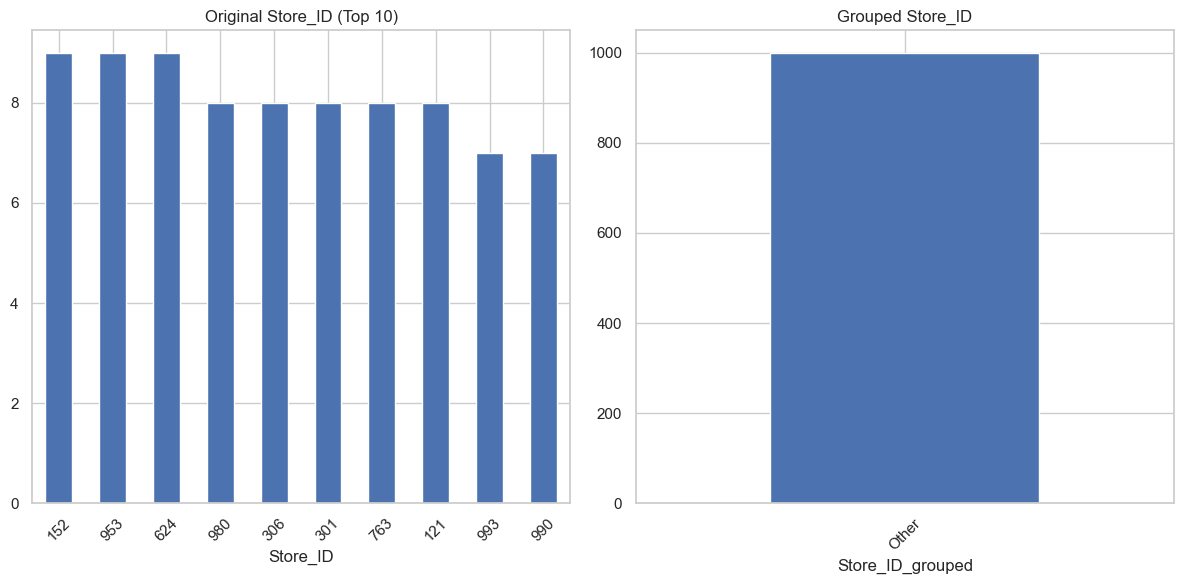


Hierarchical Grouping of ZIP Codes (by prefix):


ZIP_Prefix
829    23
445    21
964    19
693    19
841    19
710    17
480    16
347    16
825    15
246    15
Name: count, dtype: int64

Warning during binning 'Product_ID': Bin labels must be one fewer than the number of bin edges

Product_ID Grouped by Target Behavior:


Product_ID_binned
Unknown    1000
Name: count, dtype: int64

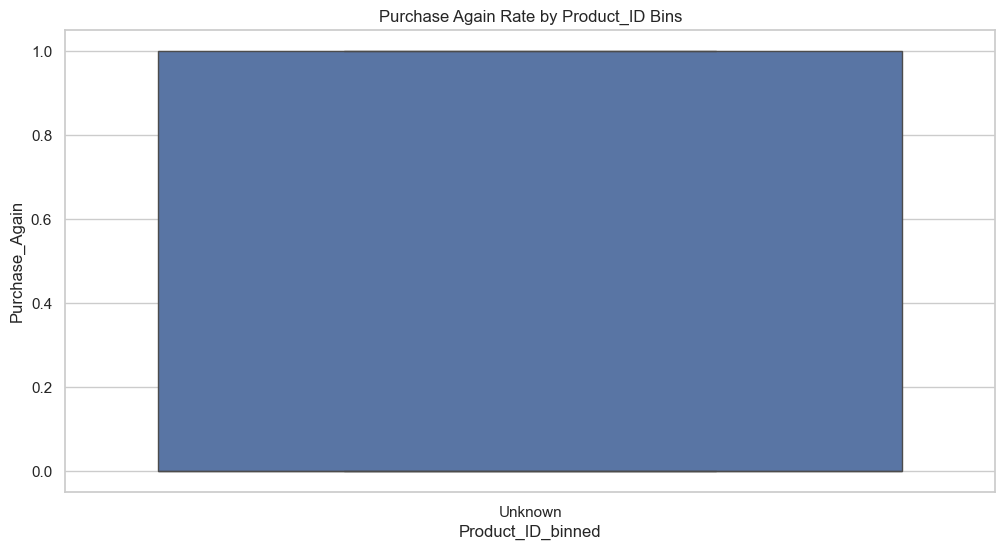


PCA on Encoded ZIP Prefixes:


,ZIP_Prefix,ZIP_PCA_1,ZIP_PCA_2,ZIP_PCA_3,ZIP_PCA_4,ZIP_PCA_5
0,341,-0.013985,-0.012999,2.433145e-18,4.385591e-17,-0.021868
1,912,-0.019170,-0.018888,9.068747e-17,3.790021e-17,-0.035179
2,579,-0.021128,-0.021301,4.675695e-17,4.821449e-18,-0.041493
3,693,-0.054589,-0.091196,7.145633e-01,-3.950518e-01,0.539613
4,214,-0.017544,-0.016966,8.697394e-18,5.421467e-17,-0.030533



PCA Explained Variance Ratio:
[0.02306548 0.02108167 0.01923092 0.01923092 0.0187973 ]
Total explained variance: 0.1014

Feature Hashing for Product_ID:


,Product_Hash_1,Product_Hash_2,Product_Hash_3,Product_Hash_4,Product_Hash_5
0,0.0,-1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0



Comparison of High Cardinality Handling Methods:


,Accuracy,AUC
Original High Cardinality,0.630000,0.664650
Grouped Rare Categories,0.583333,0.600111
Hierarchical Grouping,0.630000,0.669010
Target-Based Binning,0.583333,0.606785
PCA Features,0.603333,0.630011
Hashing Features,0.643333,0.665362


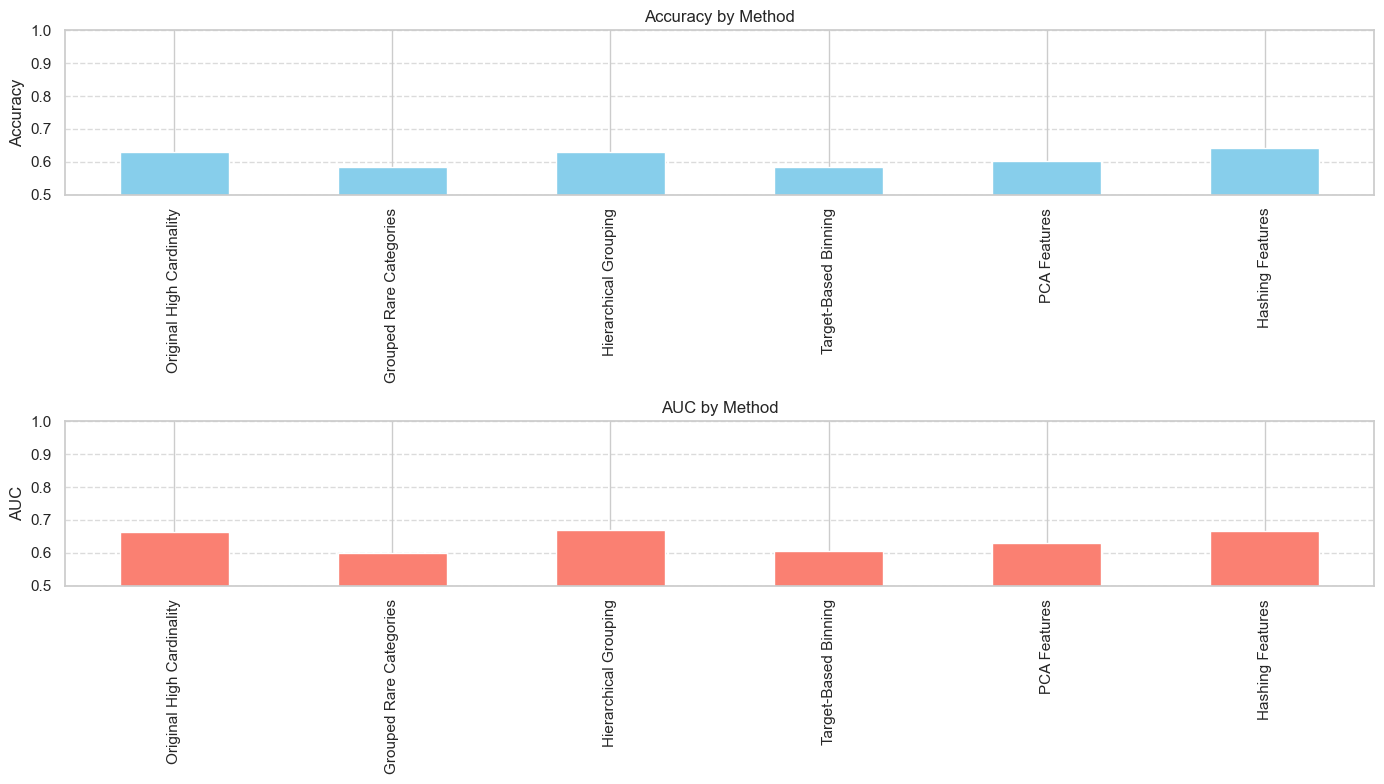


Summary of High Cardinality Handling Techniques:
1. Grouping Rare Categories:
   + Reduces dimensionality
   + Handles infrequent values
   - May lose information
   - Requires setting a threshold

2. Hierarchical Grouping:
   + Preserves information structure
   + Uses domain knowledge
   - Requires understanding of the feature
   - May not always be possible

3. Target-Based Binning:
   + Directly relates to target variable
   + Creates meaningful groups
   - Risk of target leakage
   - Requires careful validation

4. Dimensionality Reduction:
   + Efficiently compresses information
   + Can capture complex relationships
   - Less interpretable
   - Requires preprocessing

5. Feature Hashing:
   + Handles any number of categories
   + Memory efficient
   - Hash collisions
   - Loss of interpretability


In [10]:
# Create a dataset with high cardinality features
np.random.seed(42)
n = 1000

# Generate data with a high-cardinality feature (ZIP code)
zipcode_range = range(10000, 99999)
sample_zipcodes = np.random.choice(zipcode_range, size=100, replace=False)
zipcodes = np.random.choice(sample_zipcodes, size=n)

high_card_data = {
    'Customer_ID': range(1, n+1),
    'ZIP_Code': zipcodes,
    'Product_ID': np.random.choice(range(1000, 9999), size=n),
    'Store_ID': np.random.choice(range(100, 999), size=n, p=np.random.dirichlet(np.ones(899), 1)[0]),
    'Transaction_Amount': np.random.gamma(5, 20, n)
}

hc_df = pd.DataFrame(high_card_data)

# Add target for ML examples
hc_df['Purchase_Again'] = (hc_df['Transaction_Amount'] > 100).astype(int)
hc_df['Purchase_Again'] = hc_df['Purchase_Again'] ^ (np.random.random(n) > 0.7).astype(int)

print("High Cardinality Dataset:")
display(hc_df.head())

print("\nCardinality of Categorical Features:")
print(f"ZIP_Code: {hc_df['ZIP_Code'].nunique()} unique values")
print(f"Product_ID: {hc_df['Product_ID'].nunique()} unique values")
print(f"Store_ID: {hc_df['Store_ID'].nunique()} unique values")

# 1. Grouping Rare Categories
def group_rare_categories(df, col, threshold=0.05):
    """Group categories that appear less than threshold% of the time"""
    counts = df[col].value_counts(normalize=True)
    mask = counts >= threshold
    categories_to_keep = counts[mask].index
    df_new = df.copy()
    df_new[f'{col}_grouped'] = df_new[col].apply(lambda x: x if x in categories_to_keep else 'Other')
    return df_new

# Apply to Store_ID
hc_df = group_rare_categories(hc_df, 'Store_ID', threshold=0.02)
print("\nStore_ID After Grouping Rare Categories:")
display(hc_df['Store_ID_grouped'].value_counts().head(10))

# Visualize effect of grouping
plt.figure(figsize=(12, 6))
plt.subplot(121)
hc_df['Store_ID'].value_counts().head(10).plot(kind='bar')
plt.title('Original Store_ID (Top 10)')
plt.xticks(rotation=45)

plt.subplot(122)
hc_df['Store_ID_grouped'].value_counts().plot(kind='bar')
plt.title('Grouped Store_ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Hierarchical Grouping (by prefix, simulating geographic information in ZIP codes)
hc_df['ZIP_Prefix'] = hc_df['ZIP_Code'].astype(str).str[:3]
print("\nHierarchical Grouping of ZIP Codes (by prefix):")
display(hc_df['ZIP_Prefix'].value_counts().head(10))

# # 3. Group by Target Behavior (Group by statistical property related to target)
# def group_by_target_mean(df, cat_col, target_col, bins=5):
#     # Calculate the mean of the target for each category
#     means = df.groupby(cat_col)[target_col].mean().to_dict()
#     # Map each category to its mean
#     df[f'{cat_col}_target_mean'] = df[cat_col].map(means)
#     # Create bins based on the mean values
#     df[f'{cat_col}_binned'] = pd.qcut(df[f'{cat_col}_target_mean'], 
#                                      q=bins, 
#                                      labels=[f'Bin_{i+1}' for i in range(bins)])
#     return df

# 3. Group by Target Behavior (Group by statistical property related to target)
def group_by_target_mean(df, cat_col, target_col, bins=5):
    # Calculate the mean of the target for each category
    means = df.groupby(cat_col)[target_col].mean().to_dict()
    # Map each category to its mean
    df[f'{cat_col}_target_mean'] = df[cat_col].map(means)
    # Drop NaNs and constant values before qcut
    try:
        df[f'{cat_col}_binned'] = pd.qcut(df[f'{cat_col}_target_mean'],
                                          q=bins,
                                          labels=[f'Bin_{i+1}' for i in range(bins)],
                                          duplicates='drop')
    except ValueError as e:
        print(f"Warning during binning '{cat_col}': {e}")
        df[f'{cat_col}_binned'] = 'Unknown'
    return df

# Apply to Product_ID
hc_df = group_by_target_mean(hc_df, 'Product_ID', 'Purchase_Again', bins=5)
print("\nProduct_ID Grouped by Target Behavior:")
display(hc_df['Product_ID_binned'].value_counts())

# Visualize relationship between original and binned categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=hc_df, x='Product_ID_binned', y='Purchase_Again')
plt.title('Purchase Again Rate by Product_ID Bins')
plt.show()

# 4. Dimensionality Reduction on Encoded Categories
from sklearn.decomposition import PCA

# One-hot encode ZIP_Prefix
zip_prefix_encoded = pd.get_dummies(hc_df['ZIP_Prefix'], prefix='ZIP')

# Apply PCA
pca = PCA(n_components=5)
zip_pca = pca.fit_transform(zip_prefix_encoded)

# Add PCA components to dataframe
for i in range(5):
    hc_df[f'ZIP_PCA_{i+1}'] = zip_pca[:, i]

print("\nPCA on Encoded ZIP Prefixes:")
display(hc_df[['ZIP_Prefix'] + [f'ZIP_PCA_{i+1}' for i in range(5)]].head())

print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# 5. Hashing (Feature Hashing / The Hashing Trick)
from sklearn.feature_extraction import FeatureHasher

# Apply feature hashing to Product_ID
hasher = FeatureHasher(n_features=10, input_type='string')
product_id_str = hc_df['Product_ID'].astype(str).values.reshape(-1, 1)
hashed_features = hasher.transform(product_id_str).toarray()

# Add hashed features to the dataframe
for i in range(10):
    hc_df[f'Product_Hash_{i+1}'] = hashed_features[:, i]

print("\nFeature Hashing for Product_ID:")
display(hc_df[[f'Product_Hash_{i+1}' for i in range(5)]].head())

# 6. Compare methods with a classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Split data
X = hc_df.drop(['Customer_ID', 'Purchase_Again'], axis=1)
y = hc_df['Purchase_Again']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Prepare different feature sets
feature_sets = {
    'Original High Cardinality': ['ZIP_Code', 'Product_ID', 'Store_ID', 'Transaction_Amount'],
    'Grouped Rare Categories': ['ZIP_Code', 'Product_ID', 'Store_ID_grouped', 'Transaction_Amount'],
    'Hierarchical Grouping': ['ZIP_Prefix', 'Product_ID', 'Store_ID', 'Transaction_Amount'],
    'Target-Based Binning': ['ZIP_Code', 'Product_ID_binned', 'Store_ID', 'Transaction_Amount'],
    'PCA Features': [f'ZIP_PCA_{i+1}' for i in range(5)] + ['Product_ID', 'Store_ID', 'Transaction_Amount'],
    'Hashing Features': [f'Product_Hash_{i+1}' for i in range(10)] + ['ZIP_Code', 'Store_ID', 'Transaction_Amount']
}

# Evaluate each feature set
model_results = {}
for name, features in feature_sets.items():
    # Handle categorical features for each approach
    X_train_set = X_train[features].copy()
    X_test_set = X_test[features].copy()
    
    # Convert remaining categorical columns
    for col in X_train_set.select_dtypes(include=['object', 'int64']).columns:
        if X_train_set[col].nunique() < 50:  # Only one-hot encode if cardinality is manageable
            X_train_dummies = pd.get_dummies(X_train_set[col], prefix=col)
            X_test_dummies = pd.get_dummies(X_test_set[col], prefix=col)
            
            # Handle potential difference in columns
            for c in X_train_dummies.columns:
                if c not in X_test_dummies.columns:
                    X_test_dummies[c] = 0
            X_test_dummies = X_test_dummies[X_train_dummies.columns]
            
            # Replace original column with dummy variables
            X_train_set = pd.concat([X_train_set.drop(col, axis=1), X_train_dummies], axis=1)
            X_test_set = pd.concat([X_test_set.drop(col, axis=1), X_test_dummies], axis=1)
        else:
            # For very high cardinality, use label encoding instead
            # le = LabelEncoder()
            # X_train_set[col] = le.fit_transform(X_train_set[col])
            # X_test_set[col] = le.transform(X_test_set[col])
            le = LabelEncoder()
            X_train_set[col] = le.fit_transform(X_train_set[col])
            # Create a mapping dictionary
            label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            # Apply the mapping to the test set, unknown labels get -1
            X_test_set[col] = X_test_set[col].map(label_mapping).fillna(-1).astype(int)

    
    # Train and evaluate model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_set, y_train)
    y_pred = model.predict(X_test_set)
    y_pred_proba = model.predict_proba(X_test_set)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    model_results[name] = {'Accuracy': accuracy, 'AUC': auc}

# Display results
results_df = pd.DataFrame(model_results).T
print("\nComparison of High Cardinality Handling Methods:")
display(results_df)

# Plot comparison
plt.figure(figsize=(14, 8))
plt.subplot(211)
results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Accuracy by Method')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.0)

plt.subplot(212)
results_df['AUC'].plot(kind='bar', color='salmon')
plt.title('AUC by Method')
plt.ylabel('AUC')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Summary of techniques
print("\nSummary of High Cardinality Handling Techniques:")
print("1. Grouping Rare Categories:")
print("   + Reduces dimensionality")
print("   + Handles infrequent values")
print("   - May lose information")
print("   - Requires setting a threshold")

print("\n2. Hierarchical Grouping:")
print("   + Preserves information structure")
print("   + Uses domain knowledge")
print("   - Requires understanding of the feature")
print("   - May not always be possible")

print("\n3. Target-Based Binning:")
print("   + Directly relates to target variable")
print("   + Creates meaningful groups")
print("   - Risk of target leakage")
print("   - Requires careful validation")

print("\n4. Dimensionality Reduction:")
print("   + Efficiently compresses information")
print("   + Can capture complex relationships")
print("   - Less interpretable")
print("   - Requires preprocessing")

print("\n5. Feature Hashing:")
print("   + Handles any number of categories")
print("   + Memory efficient")
print("   - Hash collisions")
print("   - Loss of interpretability")

## Conclusion

Working with categorical data is a fundamental skill in data science. In this notebook, we've explored:

1. **Understanding categorical data types** - nominal vs. ordinal data
2. **Creating and manipulating categorical data** in pandas  
3. **Encoding techniques** - label, one-hot, ordinal, target encoding and more
4. **Pandas functions** for categorical data analysis
5. **Visualization techniques** for categorical variables
6. **Statistical analysis** methods for categorical data
7. **Advanced feature engineering** approaches
8. **Solutions for high cardinality** categorical variables

The most appropriate technique depends on your specific data, domain knowledge, and modeling goals. Experimenting with different approaches is often necessary to find the optimal solution.